In [2]:
# Add Matplotlib inline magic command
%matplotlib notebook
%matplotlib inline
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#importing files
seriously_injured=pd.read_csv("../DB_Extracts/seriously_injured_data.csv",low_memory=False)
road_class=pd.read_csv("../DB_Extracts/road_class.csv")

In [3]:
#creating copy of data
df_seriously_injured=seriously_injured.copy()
df_road_class=road_class.copy()

In [4]:
pd.options.display.max_columns = None         # to print all columns

In [5]:
#Info about dataframe
df_seriously_injured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACCNUM           16860 non-null  int64  
 1   ObjectId         16860 non-null  int64  
 2   INVTYPE          16848 non-null  object 
 3   INVAGE           16860 non-null  object 
 4   INJURY_ID        15248 non-null  float64
 5   FATAL_NO         713 non-null    float64
 6   INITDIR          11966 non-null  object 
 7   VEHTYPE          14047 non-null  object 
 8   MANOEUVER        9627 non-null   object 
 9   DRIVACT          8462 non-null   object 
 10  DRIVCOND         8464 non-null   object 
 11  PEDTYPE          2786 non-null   object 
 12  PEDACT           2779 non-null   object 
 13  PEDCOND          2835 non-null   object 
 14  CYCLISTYPE       700 non-null    object 
 15  CYCACT           707 non-null    object 
 16  CYCCOND          706 non-null    object 
 17  PEDESTRIAN  

In [6]:
#find number of uniques in dataframe
df_seriously_injured.nunique()

ACCNUM              6002
ObjectId           16860
INVTYPE               18
INVAGE                21
INJURY_ID              5
FATAL_NO              78
INITDIR                5
VEHTYPE               27
MANOEUVER             16
DRIVACT               13
DRIVCOND              10
PEDTYPE               16
PEDACT                15
PEDCOND               10
CYCLISTYPE            22
CYCACT                11
CYCCOND               10
PEDESTRIAN             1
CYCLIST                1
AUTOMOBILE             1
MOTORCYCLE             1
TRUCK                  1
TRSN_CITY_VEH          1
EMERG_VEH              1
PASSENGER              1
SPEEDING               1
AG_DRIV                1
REDLIGHT               1
ALCOHOL                1
DISABILITY             1
YEAR                  15
DATE                3549
TIME                1311
HOUR                  24
STREET1             1714
STREET2             2567
OFFSET               419
ROAD_CLASS_ID         10
DISTRICT               5
WARDNUM               25


In [7]:
#Getting only Longitude and Latitude values in geometry2 column
import re
df_seriously_injured["geometry2"] = df_seriously_injured["geometry"].str.extract(r"\((.*?)\)")

In [8]:
# split geometry2 into two columns: long & Lat
df_seriously_injured[['Longitude', 'Latitude']] = df_seriously_injured['geometry2'].str.split(',', 1, expand=True)

In [9]:
#Standardize Lat & Long Length to match between the files
df_seriously_injured['Longitude']=df_seriously_injured.Longitude.map(lambda l: l[:8])
df_seriously_injured['Latitude']=df_seriously_injured.Latitude.map(lambda l: l[:8].replace(" ",''))
df_seriously_injured.drop(["geometry"],axis=1, inplace=True)

In [10]:
#Changing datatype to float for Latitude and Longitude columns
df_seriously_injured=df_seriously_injured.astype({'Longitude':'float','Latitude':'float'})

In [11]:
#Changing data type of DATE column to datetime
df_seriously_injured['DATE'] = pd.to_datetime(df_seriously_injured['DATE'])

In [12]:
#checking duplicate records
duplicates=df_seriously_injured[df_seriously_injured.ACCNUM.duplicated()]
duplicates

,ACCNUM,ObjectId,INVTYPE,INVAGE,INJURY_ID,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS_ID,DISTRICT,WARDNUM,DIVISION,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,geometry2,Longitude,Latitude
1,25301,16396,Pedestrian,65 to 69,4.0,NaN,East,NaN,NaN,NaN,NaN,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Medical or Physical Disability,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,9 m North of,1.0,North York,15.0,53.0,Intersection,Intersection Related,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,D53,56,Leaside-Bennington (56),"-79.377116, 43.710967",-79.3771,43.7109
3,26294,16407,Driver,20 to 24,1.0,NaN,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,GERRARD ST E,1.0,Toronto and East York,13.0,51.0,Mid-Block,Non Intersection,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,D51,73,Moss Park (73),"-79.37556, 43.659568",-79.3755,43.6595
5,37330,16507,Pedestrian,75 to 79,4.0,NaN,North,NaN,NaN,NaN,NaN,Vehicle is going straight thru inter.while ped...,Crossing with right of way,Normal,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,6 m South of,3.0,Toronto East York,9.0,11.0,Intersection,At Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,D11,84,Little Portugal (84),"-79.43365, 43.649699",-79.4336,43.6496
7,45664,16514,Passenger,20 to 24,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,NaN,1.0,Scarborough,NaN,41.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,D41,120,Clairlea-Birchmount (120),"-79.297481, 43.725577",-79.2974,43.7255
8,45664,16510,Driver,35 to 39,1.0,NaN,West,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Inattentive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,NaN,1.0,Scarborough,NaN,41.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,D41,120,Clairlea-Birchmount (120),"-79.297481, 43.725577",-79.2974,43.7255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854,9002501134,16286,Passenger,15 to 19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,NaN,1.0,Etobicoke York,NaN,23.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,D23,1,West Humber-Clairville (1),"-79.570796, 43.691519",-79.5707,43.6915
16855,9002501134,16387,Pedestrian,50 to 54,4.0,NaN,Unknown,NaN,NaN,NaN,NaN,Vehicle turns left while ped crosses without R...,Crossing without right of way,Inattentive,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,2019,2019-12-28,1740,17,MARTIN GROVE RD,DIXON RD,NaN,1.0,Etobicoke York,NaN,23.0,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,D23,1,West Humber-Clairville (1),"-79.570796, 43.691519",-79.5707,43.6915
16857,9085345312,15299,Driver,25 to 29,1.0,NaN,North,"Automobile, Station Wagon",Making U Turn,Driving Properly,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,

In [13]:
#Deleting Duplicates
df_seriously_injured=df_seriously_injured.drop_duplicates(subset=["ACCNUM"], keep="first")

In [14]:
#Dropping the column not playing any role in analysis: may cause noise
df_seriously_injured.drop(["OFFSET","DISTRICT","WARDNUM","DIVISION","ACCLOC","FATAL_NO","INITDIR","MANOEUVER","PEDTYPE","PEDACT","PEDCOND","CYCLISTYPE",'CYCACT','CYCCOND','PEDESTRIAN','CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','PASSENGER','POLICE_DIVISION','HOOD_ID','NEIGHBOURHOOD','ObjectId',"geometry2","DRIVACT","DRIVCOND","AG_DRIV","DISABILITY"], axis=1, inplace=True)
df_seriously_injured.head()

,ACCNUM,INVTYPE,INVAGE,INJURY_ID,VEHTYPE,SPEEDING,REDLIGHT,ALCOHOL,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS_ID,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,Longitude,Latitude
0,25301,Driver,75 to 79,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-04,1850,18,EGLINTON AVE E,BAYVIEW AVE,1.0,Intersection,Traffic Signal,Rain,Dark,Wet,Non-Fatal Injury,Pedestrian Collisions,-79.3771,43.7109
2,26294,Pedestrian,65 to 69,2.0,NaN,NaN,NaN,NaN,2020,2020-01-04,2214,22,256 JARVIS ST,NaN,1.0,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,-79.3755,43.6595
4,37330,Driver,50 to 54,1.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-06,1555,15,DUNDAS ST W,SHERIDAN AVE,3.0,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,-79.4336,43.6496
6,45664,Driver,50 to 54,5.0,"Automobile, Station Wagon",NaN,NaN,NaN,2020,2020-01-07,1850,18,EGLINTON AVE E,PHARMACY AVE,1.0,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Turning Movement,-79.2974,43.7255
9,56815,Driver,45 to 49,1.0,Delivery Van,Yes,Yes,NaN,2020,2020-01-09,1100,11,MARTIN GROVE RD,BELFIELD RD,1.0,Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,-79.5755,43.7018


In [15]:
#Checkinf dataframe info again
df_seriously_injured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6002 entries, 0 to 16856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ACCNUM         6002 non-null   int64         
 1   INVTYPE        5994 non-null   object        
 2   INVAGE         6002 non-null   object        
 3   INJURY_ID      5310 non-null   float64       
 4   VEHTYPE        5584 non-null   object        
 5   SPEEDING       711 non-null    object        
 6   REDLIGHT       376 non-null    object        
 7   ALCOHOL        231 non-null    object        
 8   YEAR           6002 non-null   int64         
 9   DATE           6002 non-null   datetime64[ns]
 10  TIME           6002 non-null   int64         
 11  HOUR           6002 non-null   int64         
 12  STREET1        6002 non-null   object        
 13  STREET2        5425 non-null   object        
 14  ROAD_CLASS_ID  5838 non-null   float64       
 15  LOCCOORD       5964 

In [16]:
#Involvement Types invovled in total accidents 
df_involvement_type=pd.DataFrame(df_seriously_injured.groupby(["INVTYPE"],as_index=False)["ACCNUM"].count())
df_involvement_type

,INVTYPE,ACCNUM
0,Cyclist,167
1,Driver,3584
2,Driver - Not Hit,6
3,In-Line Skater,2
4,Moped Driver,13
5,Motorcycle Driver,347
6,Motorcycle Passenger,13
7,Other,42
8,Other Property Owner,24
9,Passenger,465


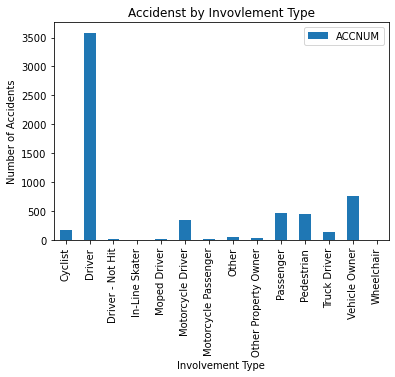

<Figure size 432x288 with 0 Axes>

In [17]:
# Create the plot.
df_involvement_type.plot("INVTYPE", "ACCNUM",kind="bar")
# Create labels for the x and y axes.
plt.xlabel("Involvement Type")
plt.ylabel("Number of Accidents")
# Create a title.
plt.title("Accidenst by Invovlement Type")
plt.xticks(rotation=90)
# Add the legend.
plt.legend()
plt.show()
plt.tight_layout()

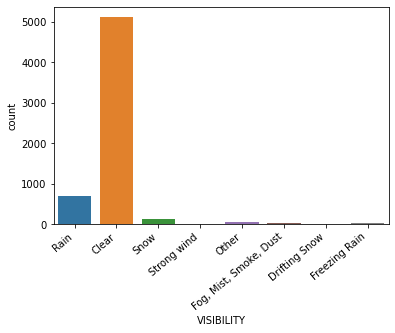

In [18]:
# VISIBILITY FACTOR COUNT
wplot = sns.countplot(data=df_seriously_injured,x="VISIBILITY")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

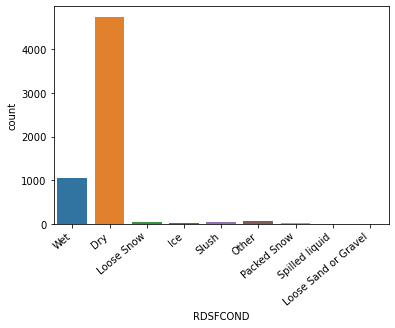

In [19]:
# ROAD CONDITION FACTOR
wplot = sns.countplot(data=df_seriously_injured,x="RDSFCOND")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

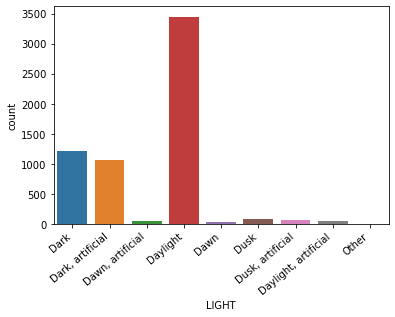

In [20]:
# LIGHT FACTOR COUNT
wplot = sns.countplot(data=df_seriously_injured,x="LIGHT")
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [21]:
#Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_visibility=pd.DataFrame(df_seriously_injured.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility

,VISIBILITY,ACCLASS,ACCNUM
0,Clear,Fatal,677
1,Clear,Non-Fatal Injury,4437
2,Clear,Property Damage Only,1
3,Drifting Snow,Non-Fatal Injury,7
4,"Fog, Mist, Smoke, Dust",Fatal,3
5,"Fog, Mist, Smoke, Dust",Non-Fatal Injury,13
6,Freezing Rain,Fatal,1
7,Freezing Rain,Non-Fatal Injury,14
8,Other,Fatal,19
9,Other,Non-Fatal Injury,22


In [22]:
#Remove outliers
df_seriously_injured.drop(df_seriously_injured.loc[df_seriously_injured['ACCLASS'] == "Property Damage Only"].index, inplace=True)

<AxesSubplot:xlabel='ACCLASS'>

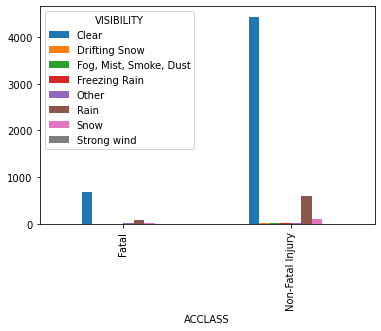

In [23]:
#Creating bar chart for Visibility
df_visibility=pd.DataFrame(df_seriously_injured.groupby(["VISIBILITY","ACCLASS"],as_index=False)["ACCNUM"].count())
df_visibility.pivot_table(index="ACCLASS",columns="VISIBILITY").plot(kind="bar",y="ACCNUM")

In [24]:
#####Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_alcohol=pd.DataFrame(df_seriously_injured.groupby(["ALCOHOL","ACCLASS"],as_index=False)["ACCNUM"].count())
df_alcohol

,ALCOHOL,ACCLASS,ACCNUM
0,Yes,Fatal,36
1,Yes,Non-Fatal Injury,195


In [25]:
#Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_speeding=pd.DataFrame(df_seriously_injured.groupby(["SPEEDING","ACCLASS"],as_index=False)["ACCNUM"].count())
df_speeding

,SPEEDING,ACCLASS,ACCNUM
0,Yes,Fatal,154
1,Yes,Non-Fatal Injury,556


In [26]:
#Total number of accidenst due to Visibity issue and if they were Fatal or not.
df_RedLight=pd.DataFrame(df_seriously_injured.groupby(["REDLIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_RedLight

,REDLIGHT,ACCLASS,ACCNUM
0,Yes,Fatal,51
1,Yes,Non-Fatal Injury,325


In [27]:
#Total number of accidenst due to Road Condition and if they were Fatal or not.
df_roadcondition=pd.DataFrame(df_seriously_injured.groupby(["RDSFCOND","ACCLASS"],as_index=False)["ACCNUM"].count())
df_roadcondition

,RDSFCOND,ACCLASS,ACCNUM
0,Dry,Fatal,621
1,Dry,Non-Fatal Injury,4123
2,Ice,Fatal,1
3,Ice,Non-Fatal Injury,21
4,Loose Sand or Gravel,Non-Fatal Injury,4
5,Loose Snow,Fatal,4
6,Loose Snow,Non-Fatal Injury,48
7,Other,Fatal,22
8,Other,Non-Fatal Injury,36
9,Packed Snow,Fatal,4


<AxesSubplot:xlabel='ACCLASS'>

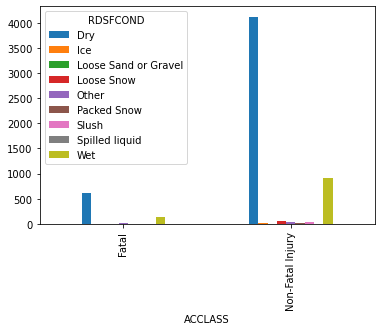

In [28]:
#Creating Bar chart for road condition
df_roadcondition.pivot_table(index="ACCLASS",columns="RDSFCOND").plot(kind="bar",y="ACCNUM")

In [29]:
#Total number of accidenst due to Light Condition and if they were Fatal or not.
df_light=pd.DataFrame(df_seriously_injured.groupby(["LIGHT","ACCLASS"],as_index=False)["ACCNUM"].count())
df_light

,LIGHT,ACCLASS,ACCNUM
0,Dark,Fatal,198
1,Dark,Non-Fatal Injury,1007
2,"Dark, artificial",Fatal,156
3,"Dark, artificial",Non-Fatal Injury,912
4,Dawn,Fatal,5
5,Dawn,Non-Fatal Injury,31
6,"Dawn, artificial",Fatal,9
7,"Dawn, artificial",Non-Fatal Injury,29
8,Daylight,Fatal,408
9,Daylight,Non-Fatal Injury,3040


<AxesSubplot:xlabel='ACCLASS'>

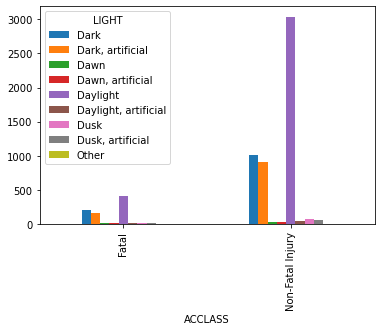

In [30]:
#Creating Bar chart for Light
df_light.pivot_table(index="ACCLASS",columns="LIGHT").plot(kind="bar",y="ACCNUM")

In [31]:
#Total number of accidenst based on the Impact Type
df_impact_type=pd.DataFrame(df_seriously_injured.groupby(["IMPACTYPE"],as_index=False)["ACCNUM"].count())
df_impact_type

,IMPACTYPE,ACCNUM
0,Angle,308
1,Approaching,228
2,Cyclist Collisions,706
3,Other,68
4,Pedestrian Collisions,2676
5,Rear End,413
6,SMV Other,619
7,SMV Unattended Vehicle,62
8,Sideswipe,136
9,Turning Movement,784


<AxesSubplot:xlabel='IMPACTYPE'>

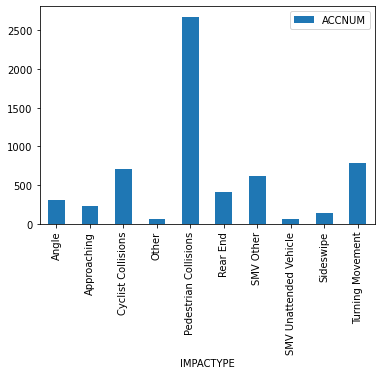

In [32]:
#Creating bar chart for IMPACT Type
df_impact_type.plot("IMPACTYPE","ACCNUM",kind="bar")

In [33]:
#On which hour of the day we have most accident 
df_hourofthedayaccident=pd.DataFrame(df_seriously_injured.groupby(["HOUR"])["ACCNUM"].count())
df_hourofthedayaccident

,ACCNUM
HOUR,
0,173
1,144
2,161
3,134
4,61
5,104
6,203
7,210
8,242


<AxesSubplot:ylabel='HOUR'>

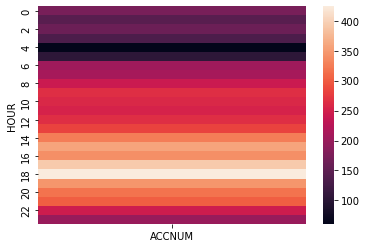

In [34]:
sns.heatmap(df_hourofthedayaccident)

In [35]:
#In which year we have most accident 
df_Yearofaccident=pd.DataFrame(df_seriously_injured.groupby(["YEAR"])["ACCNUM"].count())
df_Yearofaccident

,ACCNUM
YEAR,
2006,481
2007,453
2008,417
2009,438
2010,400
2011,399
2012,453
2013,431
2014,350


<AxesSubplot:ylabel='YEAR'>

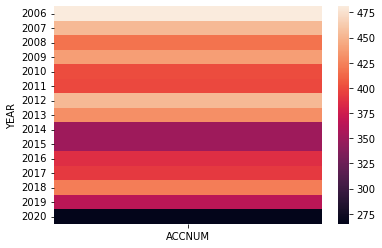

In [36]:
sns.heatmap(df_Yearofaccident)

In [37]:
#How many accidents based on Road Classification
df_road_type=pd.DataFrame(df_seriously_injured.groupby("ROAD_CLASS_ID",as_index=False)["ACCNUM"].count())
df_road_type

,ROAD_CLASS_ID,ACCNUM
0,1.0,4141
1,2.0,369
2,3.0,982
3,4.0,307
4,5.0,9
5,6.0,3
6,7.0,4
7,8.0,19
8,9.0,2
9,10.0,1


In [38]:
##Merging Road Class and Seriously Injured tables
df_road_type=pd.merge(df_road_type,df_road_class,how='left',on=['ROAD_CLASS_ID'])
df_road_type

,ROAD_CLASS_ID,ACCNUM,ROAD_CLASS
0,1.0,4141,Major Arterial
1,2.0,369,Collector
2,3.0,982,Minor Arterial
3,4.0,307,Local
4,5.0,9,Other
5,6.0,3,Pending
6,7.0,4,Laneway
7,8.0,19,Expressway
8,9.0,2,Expressway Ramp
9,10.0,1,Major Arterial Ramp


In [39]:
#Remove outliers
df_road_type.drop(df_road_type.loc[df_road_type['ACCNUM'] <20].index, inplace=True)

<AxesSubplot:xlabel='ROAD_CLASS'>

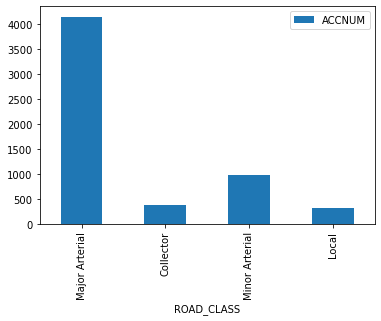

In [40]:
#Bar graph to shoulw total number of accidents based on Road Classification
df_road_type.plot("ROAD_CLASS","ACCNUM",kind="bar")

In [41]:
#Extracting Month from Date
df_seriously_injured['Month'] = df_seriously_injured['DATE'].dt.month_name()

In [42]:
#Extracting Week from Date
df_seriously_injured["Day_of_Week"]=df_seriously_injured["DATE"].dt.day_name()

# CREATING HEADMAP OF ACCIDENT DATA BY YEAR AND MONTH

In [43]:
def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month"] == month and row["Day_of_Week"] == "Monday": mon +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Tuesday": tues +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Wednesday": wed +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Thursday": thurs +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Friday": fri +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Saturday": sat +=1
        elif row["Month"] == month and row["Day_of_Week"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [44]:
#Extract RTA data for each day by month
january = RTAs_by_month(df_seriously_injured, "January")
february = RTAs_by_month(df_seriously_injured, "February")
march = RTAs_by_month(df_seriously_injured, "March")
april = RTAs_by_month(df_seriously_injured, "April")
may = RTAs_by_month(df_seriously_injured, "May")
june = RTAs_by_month(df_seriously_injured, "June")
july = RTAs_by_month(df_seriously_injured, "July")
august = RTAs_by_month(df_seriously_injured, "August")
september = RTAs_by_month(df_seriously_injured, "September")
october = RTAs_by_month(df_seriously_injured, "October")
november = RTAs_by_month(df_seriously_injured, "November")
december = RTAs_by_month(df_seriously_injured, "December")

In [45]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [46]:
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,56,78,54,53,80,52,56
February,52,51,54,55,47,56,48
March,58,53,73,53,68,58,46
April,58,64,64,53,57,59,48
May,59,76,79,76,71,68,59
June,68,99,88,97,78,83,84
July,86,69,81,73,94,60,70
August,71,90,68,88,110,93,67
September,83,91,90,84,90,85,87
October,94,77,96,87,92,71,68


Text(0.5, 1.0, 'Traffic Accidents by week for each month from 2014-2020')

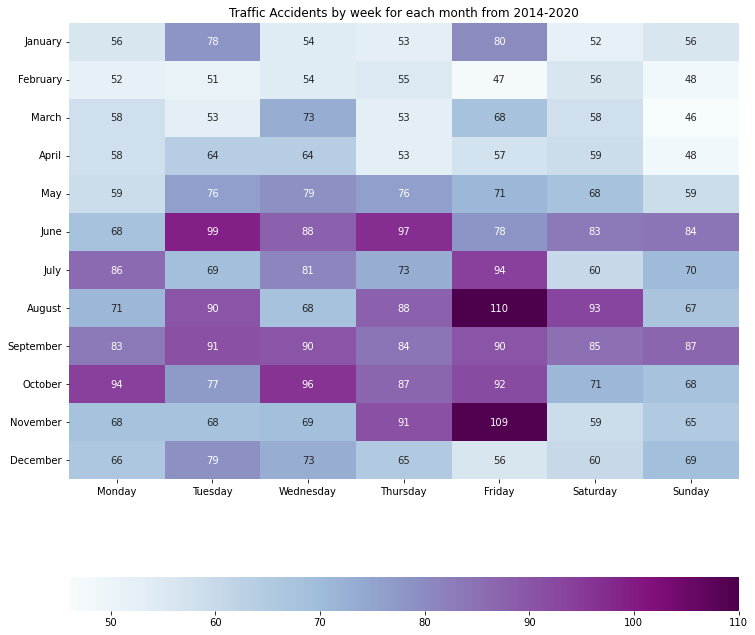

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Traffic Accidents by week for each month from 2014-2020")

In [48]:
#Exporting cleaned data to csv
df_seriously_injured.to_csv("../Resources/df_seriously_injured.csv",index=False)